# Skew T Diagrams

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

from metpy.plots import SkewT, Hodograph
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

date = datetime(2018, 6, 20, 00)
station = 'JAX'
df = WyomingUpperAir.request_data(date, station)


In [3]:
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1013.0,9,25.2,24.2,245.0,2.0,1.812616,0.845237,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
1,1001.0,117,25.2,23.5,208.0,9.0,4.225244,7.946528,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
2,1000.0,126,25.2,23.3,205.0,10.0,4.226183,9.063078,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
3,990.0,215,26.2,21.2,205.0,11.0,4.648801,9.969386,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
4,979.9,305,26.0,20.5,205.0,12.0,5.071419,10.875693,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,7.6,33291,-37.7,-74.7,58.0,34.0,-28.833635,-18.017255,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
162,7.3,33528,-37.1,-74.1,70.0,38.0,-35.708320,-12.996765,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
163,7.2,33665,-36.7,-73.7,NaN,NaN,NaN,NaN,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67
164,7.0,33860,-37.3,-74.3,NaN,NaN,NaN,NaN,JAX,72206,2018-06-20,30.5,-81.7,9.0,56.67


In [4]:
df.pressure.to_numpy()

array([1013. , 1001. , 1000. ,  990. ,  979.9,  948. ,  946.6,  925. ,
        923. ,  914.4,  889. ,  883. ,  861. ,  850. ,  822.6,  803. ,
        793.8,  792. ,  785. ,  777. ,  765.8,  756. ,  748. ,  742. ,
        738.6,  736. ,  700. ,  695. ,  661.7,  654. ,  647. ,  643. ,
        622. ,  614.5,  611. ,  591.9,  588. ,  576. ,  570. ,  559. ,
        555. ,  537. ,  530. ,  527. ,  519. ,  508.3,  507. ,  504. ,
        500. ,  499. ,  495. ,  490. ,  488.8,  482. ,  476. ,  473. ,
        470. ,  468. ,  466. ,  462. ,  458. ,  453. ,  448. ,  445. ,
        439. ,  435. ,  429. ,  417. ,  410. ,  400.5,  400. ,  390. ,
        379. ,  374. ,  368. ,  364. ,  360. ,  356. ,  350. ,  345. ,
        343. ,  341. ,  325.9,  318. ,  309. ,  302. ,  300. ,  299.4,
        276. ,  250. ,  241. ,  229.5,  213. ,  200. ,  199.5,  172.4,
        161. ,  156.3,  150. ,  146. ,  127.3,  124. ,  120.9,  118. ,
        113. ,  111. ,  107. ,  105. ,  100. ,   90.4,   76.6,   76. ,
      

In [5]:
h = df['height'].values
p = df['pressure'].values
T = df['temperature'].values
Td = df['dewpoint'].values
u = df['u_wind'].values
v = df['v_wind'].values

In [6]:
from tephigram import Tephigram

tephigram = Tephigram()
tephigram.plot_temp(p, T, marker="")
tephigram.plot_temp(p, Td, marker="", color="blue", temp_type="dewpoint", label="moisture", )

start_level = 2
parcel_p, _, _, parcel_T = mpcalc.parcel_profile_with_lcl(p[start_level:]*units.hPa, T[start_level:]*units.degC, Td[start_level:]*units.degC)
parcel_p = parcel_p.to_tuple()[0]
parcel_T = parcel_T.to(units.degC).to_tuple()[0]
lcl_prof = mpcalc.parcel_profile(p[start_level:]*units.hPa, T[start_level]*units.degC, Td[start_level]*units.degC).to('degC')
lcl_p, lcl_t = mpcalc.lcl(p[start_level]*units.hPa, T[start_level]*units.degC, Td[start_level]*units.degC)
lfc_p, lfc_t = mpcalc.lfc(p[start_level:]*units.hPa, T[start_level:]*units.degC, Td[start_level:]*units.degC, parcel_temperature_profile=lcl_prof, dewpoint_start=Td[start_level]*units.degC)
lnb_p, lnb_t = mpcalc.el(p[start_level:]*units.hPa, T[start_level:]*units.degC, Td[start_level:]*units.degC, parcel_temperature_profile=lcl_prof)

tephigram.plot_temp(parcel_p, parcel_T, marker="", color="k", temp_type="test_parcel_temp", label="Parcel Profile", )
tephigram.plot_temp(lcl_p.to_tuple()[0], lcl_t.to_tuple()[0], marker="o", color="k")
tephigram.plot_temp(lfc_p.to_tuple()[0], lfc_t.to_tuple()[0], marker="o", color="k")
tephigram.plot_temp(lnb_p.to_tuple()[0], lnb_t.to_tuple()[0], marker="o", color="k")

x_lcl, y_lcl = tephigram._tf(lcl_t.to_tuple()[0], tephigram.f_theta(lcl_p.to_tuple()[0], lcl_t.to_tuple()[0]+273.15)-273.15)
x_lfc, y_lfc = tephigram._tf(lfc_t.to_tuple()[0], tephigram.f_theta(lfc_p.to_tuple()[0], lfc_t.to_tuple()[0]+273.15)-273.15)
x_lnb, y_lnb = tephigram._tf(lnb_t.to_tuple()[0], tephigram.f_theta(lnb_p.to_tuple()[0], lnb_t.to_tuple()[0]+273.15)-273.15)

x_prof, y_prof = tephigram._tf(T[start_level:], tephigram.f_theta(p[start_level:], T[start_level:]+273.15)-273.15)
T_parcel = lcl_prof.to_tuple()[0]
x_parcel, y_parcel = tephigram._tf(parcel_T, tephigram.f_theta(parcel_p, parcel_T+273.15)-273.15)

import numpy as np
wh_cape = np.logical_and(y_prof>=y_lfc, y_prof<=y_lnb)
wh_cape_parcel = np.logical_and(y_parcel>=y_lfc, y_parcel<=y_lnb)
polygon_cape_x = np.concatenate([[x_lfc], x_prof[wh_cape], [x_lnb], x_parcel[wh_cape_parcel][::-1], [x_lfc]])
polygon_cape_y = np.concatenate([[y_lfc], y_prof[wh_cape], [y_lnb], y_parcel[wh_cape_parcel][::-1], [y_lfc]])
from matplotlib.patches import Polygon
cape_polygon = Polygon(np.stack([polygon_cape_x, polygon_cape_y], -1), facecolor='red', alpha=0.4)
tephigram.ax1.add_patch(cape_polygon)

wh_cin = y_prof<=y_lfc
wh_cin_parcel = y_parcel<=y_lfc
polygon_cin_x = np.concatenate([x_prof[wh_cin], [x_lfc], x_parcel[wh_cin_parcel][::-1]])
polygon_cin_y = np.concatenate([y_prof[wh_cin], [y_lfc], y_parcel[wh_cin_parcel][::-1]])
cin_polygon = Polygon(np.stack([polygon_cin_x, polygon_cin_y], -1), facecolor='blue', alpha=0.4)
tephigram.ax1.add_patch(cin_polygon)

# Add labels to LCL, LFC, LNB

tephigram.ax1.text(x_lcl+0.75, y_lcl+0.5, "LCL", fontsize=12)
tephigram.ax1.text(x_lfc+0.75, y_lfc+0.5, "LFC", fontsize=12)
tephigram.ax1.text(x_lnb+0.75, y_lnb+0.5, "LNB", fontsize=12)

tephigram.plot_legend()

plt.gcf().suptitle("Tephigram: " + df['station'][0] + ' ' + str(df['time'][0]) +" UTC    ", fontsize=14)

cape, cin = mpcalc.cape_cin(p[start_level:]*units.hPa, T[start_level:]*units.degC, Td[start_level:]*units.degC, lcl_prof)
parcel_info_str = r"CIN$={e_CIN:.0f}$ J/kg".format(e_CIN=cin.to_tuple()[0])\
                + "\n" + r"CAPE$={e_CAPE:.0f}$ J/kg".format(e_CAPE=cape.to_tuple()[0])

plt.text(x=0.97, y=0.98, s=parcel_info_str, horizontalalignment='right', 
        verticalalignment='top', transform=tephigram.plot.gca().transAxes,
        bbox=dict(fc="white"))

plt.subplots_adjust(bottom=0.1, top=0.95)

ModuleNotFoundError: No module named 'tephigram'

In [ ]:
mpcalc.cape_cin(p[start_level:]*units.hPa, T[start_level:]*units.degC, Td[start_level:]*units.degC, lcl_prof)

## Summary
Skew-T plots are a useful tool for visualizing and understanding sounding data. Creating Skew-T plots in python might seem challenging given their unique structural characteristics, but `MetPy`'s `SkewT` module greatly simplifies the process.

### What's next?
Next up let’s discuss [spaghetti plots](6-spaghetti).

## Resources and references

- [Wyoming Upper Air](https://weather.uwyo.edu/upperair/)
- [Siphon](https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html)
- [MetPy's SkewT documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html)
- [NOAA's JetStream](https://www.noaa.gov/jetstream)'s [Skew-T Plot](https://www.noaa.gov/jetstream/upperair/skew-t-plots) page

DCC lifecycle plot

In [ ]:
import pathlib

images_path = pathlib.Path("../DCC_lifecycle_images")
images = sorted(list(images_path.glob("*.png")))


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=300, figsize=(4.8,9.6))

ax1 = plt.subplot(311)
ax1.imshow(plt.imread(images[0]))
ax1.set_title("Growing")
ax1.set_title("(a)", loc='left', ha="right", weight="bold", fontsize=10)
ax1.text(160, 240, "1. Updraft", ha="right", fontsize=10)
ax1.text(260, 380, "2. Convergence", ha="left", fontsize=10)
ax1.text(290, 300, "3. Entrainment", ha="left", fontsize=10)
plt.xticks([])
plt.yticks([])

ax2 = plt.subplot(312)
ax2.imshow(plt.imread(images[1]))
ax2.set_title("Mature")
ax2.set_title("(b)", loc='left', ha="right", weight="bold", fontsize=10)
ax2.text(280, 160, "4. Divergence", ha="left", fontsize=10)
ax2.text(150, 30, "5. Overshooting top", ha="left", fontsize=10)
ax2.text(300, 260, "6. Precipitation downdraft", ha="left", fontsize=10)
ax2.text(350, 360, "7. Cold pool", ha="left", fontsize=10)
plt.xticks([])
plt.yticks([])

ax3 = plt.subplot(313)
ax3.imshow(plt.imread(images[2]))
ax3.set_title("Dissipating")
ax3.set_title("(c)", loc='left', ha="right", weight="bold", fontsize=10)
ax3.text(200, 240, "8. Radiatively driven circulations", ha="left", fontsize=10)
plt.xticks([])
plt.yticks([])

# for image in images:
#     plt.figure()
#     plt.imshow(plt.imread(image))

In [23]:
atmo = pd.read_csv("/Users/jonesw/libRadtran-2.0.4/data/atmmod/afglt.dat", sep='\s+', header=1)
atmo = atmo.iloc[:,:-1].rename(columns=dict(zip(list(atmo.columns)[:-1], list(atmo.columns)[1:])))

In [24]:
atmo

,z(km),p(mb),T(K),air(cm-3),o3(cm-3),o2(cm-3),h2o(cm-3),co2(cm-3),no2(cm-3)
0,120.0,0.00002,380.0,4.288552e+11,2.112500e+02,3.063125e+10,8.450001e+04,1.478750e+07,6.379750e+01
1,115.0,0.00004,299.7,8.700167e+11,4.353000e+03,8.183640e+10,2.089440e+05,3.482400e+07,1.349430e+02
2,110.0,0.00006,241.6,1.939631e+12,9.705000e+04,2.329200e+11,5.434800e+05,1.164600e+08,3.086190e+02
3,105.0,0.00013,212.0,4.441394e+12,8.890001e+05,6.223000e+11,1.511300e+06,4.889500e+08,7.289800e+02
4,100.0,0.00029,190.7,1.097638e+13,4.392000e+06,1.756800e+12,4.392000e+06,2.141100e+09,1.866600e+03
5,95.0,0.00069,184.3,2.703802e+13,1.353000e+07,4.870800e+12,1.461240e+07,7.306201e+09,4.762560e+03
6,90.0,0.00172,177.0,7.038287e+13,3.662360e+07,1.338170e+13,5.986550e+07,2.183330e+10,1.288869e+04
7,85.0,0.00440,177.1,1.799476e+14,9.005000e+07,3.602000e+13,2.341300e+08,5.763200e+10,3.457920e+04
8,80.0,0.01100,184.8,4.311244e+14,1.423620e+08,9.016260e+13,9.059399e+08,1.414992e+11,8.714280e+04
9,75.0,0.02600,201.8,9.331769e+14,1.680840e+08,1.951642e+14,3.081540e+09,3.081540e+11,2.007670e+05


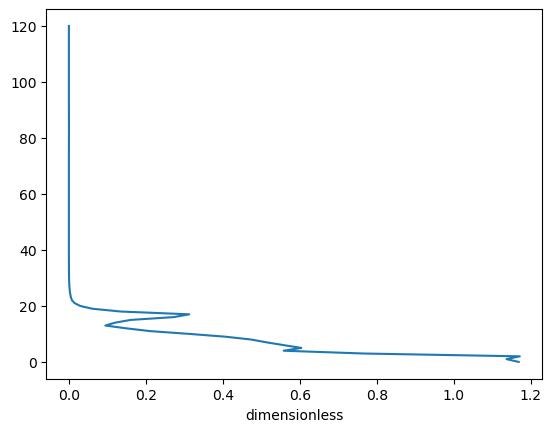

In [32]:
plt.plot(
    mpcalc.relative_humidity_from_mixing_ratio(
        atmo["p(mb)"].to_numpy() * units.millibar, atmo["T(K)"].to_numpy() * units.K, (atmo["h2o(cm-3)"]/atmo["air(cm-3)"]).to_numpy()
    ),
    atmo["z(km)"]
)